Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(os.getcwd() + r'\input\fish_train (1).csv')

In [3]:
data['Species'].value_counts()

Species
Perch        42
Bream        26
Roach        15
Pike         13
Smelt        10
Parkki        8
Whitefish     5
Name: count, dtype: int64

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [4]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [5]:
print(data['Species'])

0          Roach
1          Perch
2          Bream
3          Bream
4          Perch
         ...    
114       Parkki
115         Pike
116    Whitefish
117        Perch
118        Perch
Name: Species, Length: 119, dtype: object


In [6]:
train_x, test_x, train_y, test_y = train_test_split(data[['Species', 'Length1', 'Length2','Length3', 'Height','Width' ]],data[['Weight']], test_size=0.2, random_state=35, stratify=data['Species'])

Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [7]:
print(train_x['Width'].mean())

4.561843157894737


# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

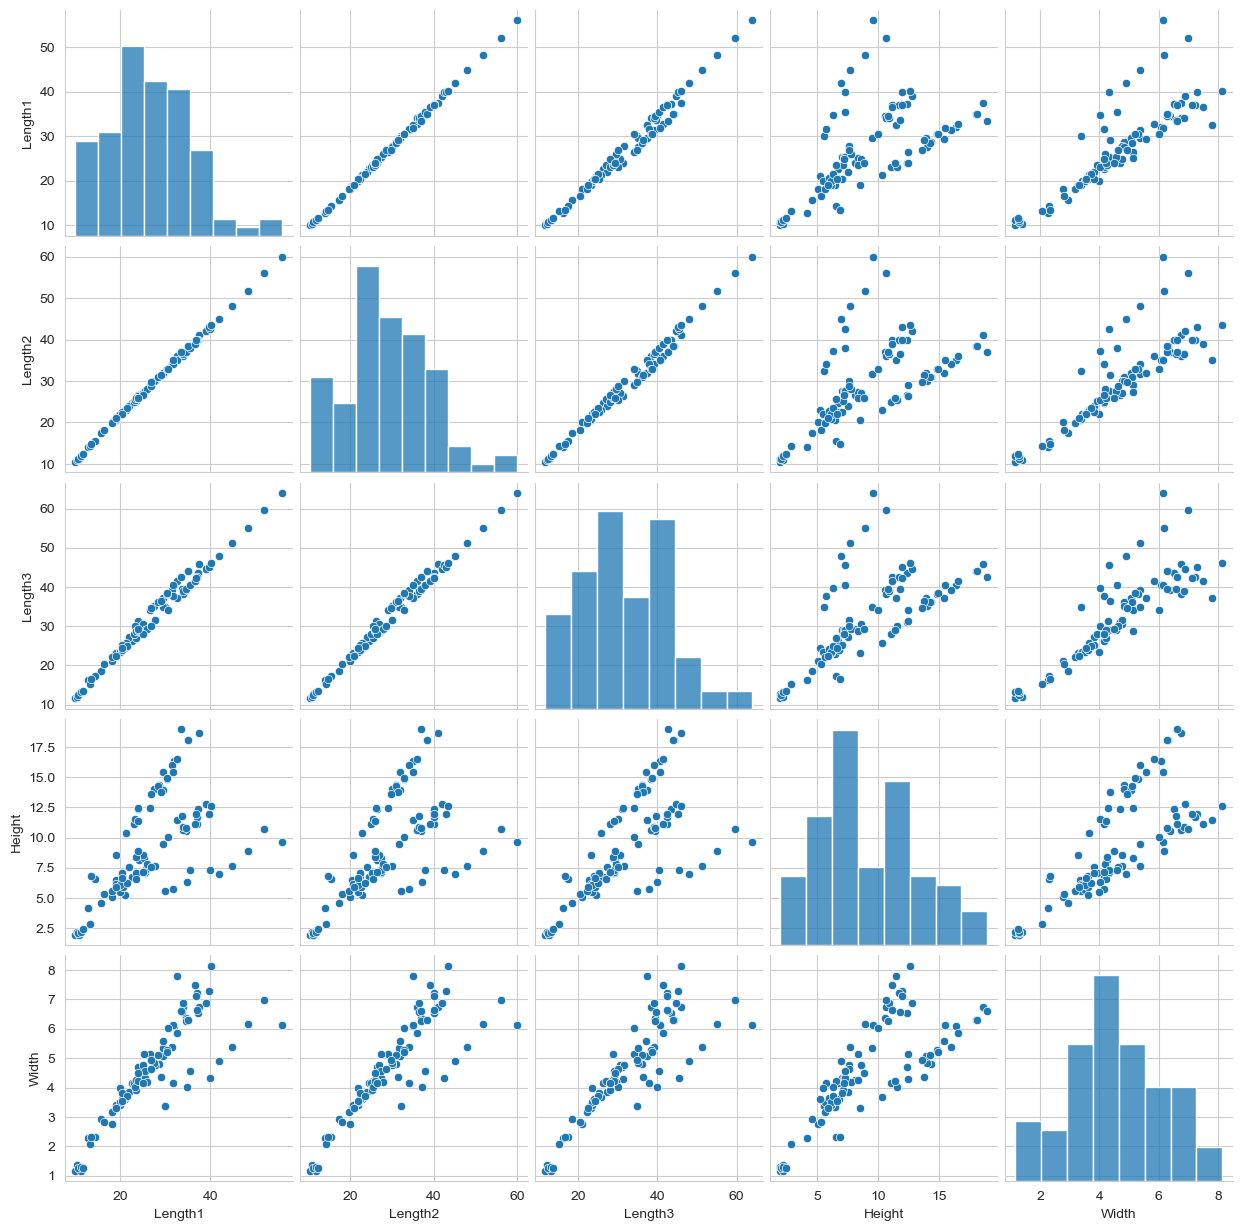

In [8]:
train = train_x[['Species','Length1', 'Length2','Length3', 'Height','Width' ]]
train['Weight'] = train_y[['Weight']]
sns.pairplot(train[['Length1', 'Length2','Length3', 'Height','Width' ]])
test = test_x[['Length1', 'Length2','Length3', 'Height','Width' ]]
test['Weight'] = test_y[['Weight']]


In [9]:
lr = LinearRegression()
lr.fit(train_x[['Length1', 'Length2','Length3', 'Height','Width' ]], train_y)
y_pred = lr.predict(test_x[['Length1', 'Length2','Length3', 'Height','Width' ]])
print(lr.score(test_x[['Length1', 'Length2','Length3', 'Height','Width' ]], test_y))

0.8417293614893449


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

          Length1   Length2   Length3    Height     Width
Length1  1.000000  0.999451  0.990543  0.602583  0.861298
Length2  0.999451  1.000000  0.993115  0.619571  0.867906
Length3  0.990543  0.993115  1.000000  0.688795  0.870026
Height   0.602583  0.619571  0.688795  1.000000  0.769379
Width    0.861298  0.867906  0.870026  0.769379  1.000000


<Axes: >

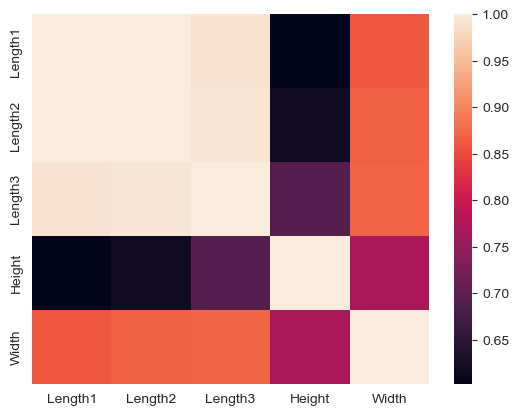

In [10]:
corr_train = train[['Length1', 'Length2','Length3', 'Height','Width' ]].corr()
print(corr_train)
sns.heatmap(corr_train)

In [11]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit_transform(train_x[['Length1', 'Length2','Length3']])
print(pca.singular_values_)


[170.24638317]


In [12]:
print(pca.explained_variance_ratio_)


[0.99607802]


In [13]:
train_x_pca = train_x[[ 'Height','Width' ]]
train_x_pca['Length'] = pca.transform(train_x[[ 'Length1', 'Length2','Length3' ]])

C:\Users\Alexander\AppData\Local\Temp\ipykernel_23184\253051686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x_pca['Length'] = pca.transform(train_x[[ 'Length1', 'Length2','Length3' ]])


In [14]:
train_x_pca['Length']

99      5.305980
112    13.255416
109    -8.403711
2       1.038694
8      -4.590682
         ...    
113    18.067860
37     24.136189
10    -14.690194
106   -29.111521
44    -24.969547
Name: Length, Length: 95, dtype: float64

In [15]:

test_x_pca = test_x[[ 'Height','Width' ]]
test_x_pca['Length']=pca.transform(test_x[['Length1', 'Length2','Length3']])

C:\Users\Alexander\AppData\Local\Temp\ipykernel_23184\2284584248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x_pca['Length']=pca.transform(test_x[['Length1', 'Length2','Length3']])


Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент. 

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков. 

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты. 

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [16]:
lr.fit(train_x_pca, train_y)

lr.score(test_x_pca, test_y)


0.8430426916929761

Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [17]:
# < ENTER YOUR CODE HERE > 

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [18]:
# < ENTER YOUR CODE HERE > 

Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

In [19]:
# < ENTER YOUR CODE HERE > 

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
class ColCube(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols


    def fit(self, X=None, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        try:
            for col in self.cols:
                X[col] = X[col].astype(float).apply(lambda x : x ** 3)
            return X
        except Exception as e:
            print(f'{self.cols} не могут быть возведены в степень {e}')
            return X



In [21]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('cube', ColCube(['Length', 'Height', 'Width']), ['Length', 'Height', 'Width'])
])

In [22]:
train_x_pca_cube = ct.fit_transform(train_x_pca)

In [23]:
train_x_pca_cube = pd.DataFrame(train_x_pca_cube)
train_x_pca_cube.rename(columns={0: 'Length', 1: 'Height', 2: 'Width'}, inplace=True)
test_x_pca_cube = ct.transform(test_x_pca)
test_x_pca_cube = pd.DataFrame(test_x_pca_cube)
test_x_pca_cube.rename(columns={0: 'Length', 1: 'Height', 2: 'Width'}, inplace=True)



Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [24]:
print(train_x_pca_cube['Width'].mean())
print(train['Width'].mean())

131.27449030707905
4.561843157894737


Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [31]:
lr.fit(train_x_pca_cube, train_y)
lr.score(test_x_pca_cube, test_y)

0.9287633986391889

Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [33]:
train_x_pca_cube_categorical = train_x_pca_cube.copy()
train_x_pca_cube_categorical['Species'] = train_x['Species']
test_x_pca_cube_categorical = test_x_pca_cube.copy()
test_x_pca_cube_categorical['Species'] = test_x['Species']

In [35]:
train_x_pca_cube_categorical

,Length,Height,Width,Species
0,149.381474,172.622610,38.463866,NaN
1,2329.056695,1181.502082,258.061189,Perch
2,-593.489794,305.283438,72.292833,Bream
3,1.120631,1926.992424,135.321746,NaN
4,-96.745670,540.427262,76.684372,NaN
...,...,...,...,...
90,5898.209150,1697.338363,358.879745,Perch
91,14060.672737,2002.281725,539.750799,NaN
92,-3170.170276,207.211951,36.182582,NaN
93,-24671.450357,14.348907,2.043548,Pike


In [36]:
test_x_pca_cube_categorical

,Length,Height,Width,Species
0,715.277273,3032.129192,187.896219,Roach
1,1481.946915,4283.494243,174.583151,NaN
2,13263.739132,472.001304,134.974119,NaN
3,-48898.137540,9.420669,2.791309,Bream
4,24013.040569,473.093337,115.501303,Perch
5,4034.213939,261.652787,62.902336,NaN
6,-3170.170276,184.462936,49.329915,NaN
7,-7947.096762,142.432927,36.647301,NaN
8,4668.815040,1921.098539,397.292313,NaN
9,-37804.017123,5.257132,1.149705,NaN


И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [37]:
train_x_pca_cube_categorical = pd.concat([train_x_pca_cube_categorical, pd.get_dummies(train_x_pca_cube_categorical['Species'])], axis=1) 

In [38]:
train_x_pca_cube_categorical = train_x_pca_cube_categorical.drop(['Species'], axis=1)

In [39]:
test_x_pca_cube_categorical = pd.concat([test_x_pca_cube_categorical, pd.get_dummies(test_x_pca_cube_categorical['Species'])], axis=1)

In [40]:
test_x_pca_cube_categorical = test_x_pca_cube_categorical.drop(['Species'], axis=1)

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.

#### Я хз поч, но дурачки решили, что лучше кодировать до разделения на выборки. То есть они подразумевали, что так надо:  

dummies = pd.get_dummies(df['Species'])

df[list(dummies.columns)] = dummies 

со всем датасетом и потом его делить

In [41]:
train_x_pca_cube_categorical

,Length,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,149.381474,172.622610,38.463866,False,False,False,False,False,False,False
1,2329.056695,1181.502082,258.061189,False,False,True,False,False,False,False
2,-593.489794,305.283438,72.292833,True,False,False,False,False,False,False
3,1.120631,1926.992424,135.321746,False,False,False,False,False,False,False
4,-96.745670,540.427262,76.684372,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
90,5898.209150,1697.338363,358.879745,False,False,True,False,False,False,False
91,14060.672737,2002.281725,539.750799,False,False,False,False,False,False,False
92,-3170.170276,207.211951,36.182582,False,False,False,False,False,False,False
93,-24671.450357,14.348907,2.043548,False,False,False,True,False,False,False


In [42]:
test_x_pca_cube_categorical['Parkki'] = False
test_x_pca_cube_categorical['Pike'] = False
test_x_pca_cube_categorical['Whitefish'] = False

In [43]:
train_x_pca_cube_categorical.columns

Index(['Length', 'Height', 'Width', 'Bream', 'Parkki', 'Perch', 'Pike',
       'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [44]:
test_x_pca_cube_categorical = test_x_pca_cube_categorical[['Length', 'Height', 'Width', 'Bream', 'Parkki', 'Perch', 'Pike',
       'Roach', 'Smelt', 'Whitefish']]

In [45]:
lr.fit(train_x_pca_cube_categorical, train_y)
lr.score(test_x_pca_cube_categorical, test_y)

0.9361579869359606

In [46]:
train_x_pca_cube_categorical = train_x_pca_cube_categorical.drop(['Bream', 'Parkki', 'Perch', 'Pike',
       'Roach', 'Smelt', 'Whitefish' ], axis=1)
test_x_pca_cube_categorical = test_x_pca_cube_categorical.drop(['Bream', 'Parkki', 'Perch', 'Pike',
       'Roach', 'Smelt', 'Whitefish'], axis=1)

In [47]:
train_x_pca_cube_categorical

,Length,Height,Width
0,149.381474,172.622610,38.463866
1,2329.056695,1181.502082,258.061189
2,-593.489794,305.283438,72.292833
3,1.120631,1926.992424,135.321746
4,-96.745670,540.427262,76.684372
...,...,...,...
90,5898.209150,1697.338363,358.879745
91,14060.672737,2002.281725,539.750799
92,-3170.170276,207.211951,36.182582
93,-24671.450357,14.348907,2.043548


In [48]:
test_x_pca_cube_categorical

,Length,Height,Width
0,715.277273,3032.129192,187.896219
1,1481.946915,4283.494243,174.583151
2,13263.739132,472.001304,134.974119
3,-48898.137540,9.420669,2.791309
4,24013.040569,473.093337,115.501303
5,4034.213939,261.652787,62.902336
6,-3170.170276,184.462936,49.329915
7,-7947.096762,142.432927,36.647301
8,4668.815040,1921.098539,397.292313
9,-37804.017123,5.257132,1.149705


In [49]:
train_x_pca_cube_categorical['Species'] = train_x['Species']
test_x_pca_cube_categorical['Species'] = test_x['Species']

In [50]:
train_x_pca_cube_categorical = pd.concat(
    [train_x_pca_cube_categorical, pd.get_dummies(train_x_pca_cube_categorical['Species'], drop_first=True)], axis=1)
train_x_pca_cube_categorical = train_x_pca_cube_categorical.drop(['Species'], axis=1)
test_x_pca_cube_categorical = pd.concat(
    [test_x_pca_cube_categorical, pd.get_dummies(test_x_pca_cube_categorical['Species'], drop_first=True)], axis=1)
test_x_pca_cube_categorical = test_x_pca_cube_categorical.drop(['Species'], axis=1)

In [51]:
train_x_pca_cube_categorical

,Length,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,149.381474,172.622610,38.463866,False,False,False,False,False,False
1,2329.056695,1181.502082,258.061189,False,True,False,False,False,False
2,-593.489794,305.283438,72.292833,False,False,False,False,False,False
3,1.120631,1926.992424,135.321746,False,False,False,False,False,False
4,-96.745670,540.427262,76.684372,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
90,5898.209150,1697.338363,358.879745,False,True,False,False,False,False
91,14060.672737,2002.281725,539.750799,False,False,False,False,False,False
92,-3170.170276,207.211951,36.182582,False,False,False,False,False,False
93,-24671.450357,14.348907,2.043548,False,False,True,False,False,False


In [52]:
test_x_pca_cube_categorical

,Length,Height,Width,Perch,Roach,Smelt
0,715.277273,3032.129192,187.896219,False,True,False
1,1481.946915,4283.494243,174.583151,False,False,False
2,13263.739132,472.001304,134.974119,False,False,False
3,-48898.137540,9.420669,2.791309,False,False,False
4,24013.040569,473.093337,115.501303,True,False,False
5,4034.213939,261.652787,62.902336,False,False,False
6,-3170.170276,184.462936,49.329915,False,False,False
7,-7947.096762,142.432927,36.647301,False,False,False
8,4668.815040,1921.098539,397.292313,False,False,False
9,-37804.017123,5.257132,1.149705,False,False,False


In [53]:
test_x_pca_cube_categorical['Parkki'] = False
test_x_pca_cube_categorical['Pike'] = False
test_x_pca_cube_categorical['Whitefish'] = False

In [54]:
test_x_pca_cube_categorical = test_x_pca_cube_categorical[['Length', 'Height', 'Width', 'Parkki', 'Perch', 'Pike',
       'Roach', 'Smelt', 'Whitefish']]

In [55]:
lr.fit(train_x_pca_cube_categorical, train_y)
lr.score(test_x_pca_cube_categorical, test_y)

0.9340514817607739